# Catalog Search of data in the AOI of Bhutan

In [1]:
import up42
import geojson
import rasterio
import geopandas as gpd
from rasterio.plot import show
import matplotlib.pyplot as plt
from shapely.geometry import box

# Following the example in:
# https://github.com/up42/up42-py/blob/master/examples/catalog-quicklooks.ipynb

# Authentification
# https://console.up42.com/ --> Developers
up42.authenticate(project_id="1bb2989f-75a5-402a-829a-da56e302db67", 
                  project_api_key="mtsXUhK9.mmatDPgoXXxlsotnkEOBq5sqNc9q19xSWAU")

# Start review catalog of available satellites
catalog = up42.initialize_catalog()
catalog

2021-06-30 15:16:03,456 - Authentication with UP42 successful!


Catalog(auth=UP42ProjectAuth(project_id=1bb2989f-75a5-402a-829a-da56e302db67, env=com))

In [2]:
# set directory to download the results
pleiades_dir = "./results/catalog/pleiades/"
spot_dir = "./results/catalog/spot/"
sentinel_dir = "./results/catalog/sentinel2/"

##### https://sdk.up42.com/reference/catalog-reference/
##### The Satellites we can find are defined by the name "sensors" this are the following, sensors=['pleiades', 'spot', 'sentinel1', 'sentinel2', 'sentinel3', 'sentinel5p']

## We will only focus on optical satellites.

In [3]:
# Geojason of the Bhutan forest
# obtained from https://mapcruzin.com/bhutan-shapefiles/bhutan_natural.zip
# Read the area of interest with Up42 package

aoi = up42.read_vector_file('AOI_Bhutan_Forest.geojson', as_dataframe=False)
#aoi

### We can start by reviewing the catalog of the Satellite from Up42

## Pleiades

2021-06-30 15:16:03,630 - Searching catalog with search_parameters: {'datetime': '2020-01-01T00:00:00Z/2021-05-31T23:59:59Z', 'intersects': {'type': 'Polygon', 'coordinates': (((90.23863465716029, 27.105424599204458), (90.64090865457698, 27.105424599204458), (90.64090865457698, 27.43797110373558), (90.23863465716029, 27.43797110373558), (90.23863465716029, 27.105424599204458)),)}, 'limit': 5, 'query': {'dataBlock': {'in': ['oneatlas-pleiades-fullscene', 'oneatlas-pleiades-display', 'oneatlas-pleiades-aoiclipped']}, 'cloudCoverage': {'lte': 20}}, 'sortby': [{'field': 'properties.cloudCoverage', 'direction': 'asc'}]}
2021-06-30 15:16:04,158 - 5 results returned.


,geometry,id,acquisitionDate,constellation,collection,providerName,blockNames,cloudCoverage,up42:usageType,providerProperties,sceneId,resolution,deliveryTime,producer
0,"POLYGON ((90.51077 27.00181, 90.54018 26.99787...",0978f0a5-5ccf-4c0f-a73d-0ee8844cabb3,2020-12-24T04:56:41Z,PHR,PHR,oneatlas,"[oneatlas-pleiades-display, oneatlas-pleiades-...",0.000000,[DATA],"{'qualified': False, 'acquisitionDate': '2020-...",DS_PHR1B_202012240456414_FR1_PX_E090N27_0803_0...,0.5,HOURS,Airbus
1,"POLYGON ((90.62873 27.32254, 90.64587 27.32058...",0019b6f6-dc3e-4a60-9d34-6ece6a5630bb,2020-12-24T04:56:32Z,PHR,PHR,oneatlas,"[oneatlas-pleiades-display, oneatlas-pleiades-...",0.000000,[DATA],"{'qualified': False, 'acquisitionDate': '2020-...",DS_PHR1B_202012240456328_FR1_PX_E090N27_0911_0...,0.5,HOURS,Airbus
2,"POLYGON ((90.28780 27.67252, 90.28857 27.33048...",13daf51d-c638-43a0-bb6b-241a131d6811,2020-11-29T04:49:15Z,PHR,PHR,oneatlas,"[oneatlas-pleiades-display, oneatlas-pleiades-...",0.000725,"[DATA, ANALYTICS]","{'qualified': False, 'acquisitionDate': '2020-...",DS_PHR1A_202011290449151_FR1_PX_E090N27_0513_0...,0.5,MINUTES,Airbus
3,"POLYGON ((90.00480 26.82299, 90.03190 26.82461...",4c7c8487-5355-4ae0-869b-7a986d1d8754,2020-12-24T04:57:42Z,PHR,PHR,oneatlas,"[oneatlas-pleiades-display, oneatlas-pleiades-...",0.000922,[DATA],"{'qualified': False, 'acquisitionDate': '2020-...",DS_PHR1B_202012240457424_FR1_PX_E090N27_0201_0...,0.5,HOURS,Airbus
4,"POLYGON ((90.46353 27.51234, 90.46465 27.32525...",0bc553b3-f49d-4778-a0d2-9cbae87b476e,2020-10-22T04:42:21Z,PHR,PHR,oneatlas,"[oneatlas-pleiades-display, oneatlas-pleiades-...",0.001883,"[DATA, ANALYTICS]","{'qualified': False, 'acquisitionDate': '2020-...",DS_PHR1A_202010220442219_FR1_PX_E090N27_0711_0...,0.5,MINUTES,Airbus


2021-06-30 15:16:05,218 - Order with order parameters {'dataProviderName': 'oneatlas', 'orderParams': {'id': '0978f0a5-5ccf-4c0f-a73d-0ee8844cabb3', 'aoi': {'type': 'Polygon', 'coordinates': (((90.23863465716029, 27.105424599204458), (90.64090865457698, 27.105424599204458), (90.64090865457698, 27.43797110373558), (90.23863465716029, 27.43797110373558), (90.23863465716029, 27.105424599204458)),)}}} is estimated to cost 141446 UP42 credits.
2021-06-30 15:16:05,220 - Getting quicklooks from provider oneatlas for image_ids: ['0978f0a5-5ccf-4c0f-a73d-0ee8844cabb3', '0019b6f6-dc3e-4a60-9d34-6ece6a5630bb', '13daf51d-c638-43a0-bb6b-241a131d6811', '4c7c8487-5355-4ae0-869b-7a986d1d8754', '0bc553b3-f49d-4778-a0d2-9cbae87b476e']
2021-06-30 15:16:05,221 - Download directory: results/catalog/pleiades
100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


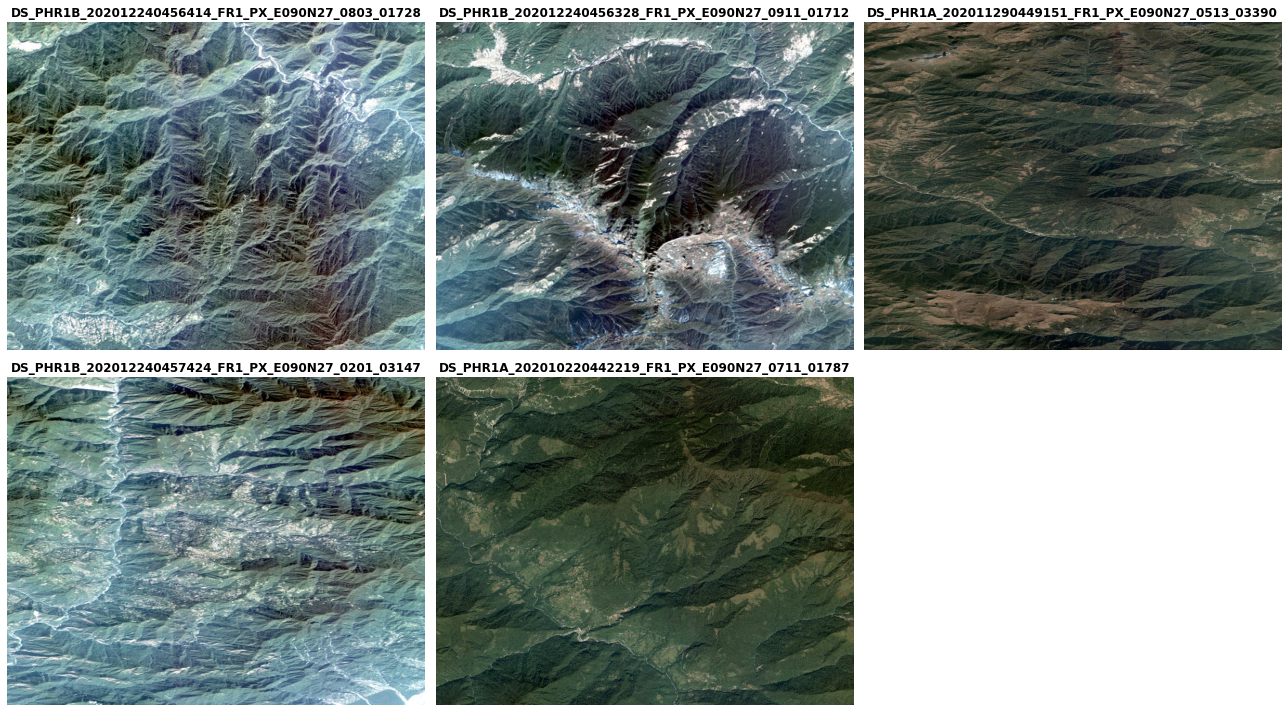

In [4]:
# Search the area via catalog search
search_parameters = catalog.construct_parameters(geometry=aoi, 
                                                 start_date="2020-01-01",
                                                 end_date="2021-05-31",
                                                 sensors=["pleiades"],
                                                 max_cloudcover=20,
                                                 sortby="cloudCoverage", 
                                                 limit=5)

search_results = catalog.search(search_parameters=search_parameters)
display(search_results.head())

catalog.estimate_order(aoi, search_results.loc[0])

catalog.download_quicklooks(image_ids=search_results.id.to_list(), 
                            sensor="pleiades", 
                            output_directory=pleiades_dir)

catalog.plot_quicklooks(figsize=(18,10), titles=search_results.sceneId.to_list())

# Select least cloud scene for further workflow
aoi["sceneId"] = search_results.sceneId.to_list()[0]

## Spot

2021-06-30 15:16:11,359 - Searching catalog with search_parameters: {'datetime': '2020-01-01T00:00:00Z/2021-05-31T23:59:59Z', 'intersects': {'type': 'Polygon', 'coordinates': (((90.23863465716029, 27.105424599204458), (90.64090865457698, 27.105424599204458), (90.64090865457698, 27.43797110373558), (90.23863465716029, 27.43797110373558), (90.23863465716029, 27.105424599204458)),)}, 'limit': 5, 'query': {'dataBlock': {'in': ['oneatlas-spot-fullscene', 'oneatlas-spot-display', 'oneatlas-spot-aoiclipped']}, 'cloudCoverage': {'lte': 20}}, 'sortby': [{'field': 'properties.cloudCoverage', 'direction': 'asc'}]}
2021-06-30 15:16:11,912 - 5 results returned.


,geometry,id,acquisitionDate,constellation,collection,providerName,blockNames,cloudCoverage,up42:usageType,providerProperties,sceneId,resolution,deliveryTime,producer
0,"POLYGON ((90.22692 27.26621, 90.22875 26.73103...",4f13e06e-8d89-4d64-ba65-2a81e0477fc8,2020-11-30T04:12:52Z,SPOT,SPOT,oneatlas,"[oneatlas-spot-display, oneatlas-spot-fullscen...",0.239570,"[DATA, ANALYTICS]","{'qualified': False, 'acquisitionDate': '2020-...",DS_SPOT6_202011300412530_FR1_FR1_SV1_SV1_E091N...,1.5,MINUTES,Airbus
1,"POLYGON ((90.22643 27.25947, 90.23300 25.27577...",04ba0d67-6feb-4e94-84a5-1357a37537d1,2020-11-17T04:14:08Z,SPOT,SPOT,oneatlas,"[oneatlas-spot-display, oneatlas-spot-fullscen...",4.027930,"[DATA, ANALYTICS]","{'qualified': False, 'acquisitionDate': '2020-...",DS_SPOT7_202011170414089_FR1_FR1_SV1_SV1_E091N...,1.5,MINUTES,Airbus
2,"POLYGON ((90.23116 28.45178, 90.23360 27.86324...",44b003ea-1fb8-4fe2-982c-ad134ff342a5,2021-03-27T04:12:56Z,SPOT,SPOT,oneatlas,"[oneatlas-spot-display, oneatlas-spot-fullscen...",5.148120,[DATA],"{'qualified': False, 'acquisitionDate': '2021-...",DS_SPOT7_202103270412564_FR1_FR1_SV1_SV1_E091N...,1.5,HOURS,Airbus
3,"POLYGON ((89.67815 28.23766, 89.67885 27.65584...",b7cfb350-8f0f-406a-88e5-40925023b5c1,2021-02-22T04:16:28Z,SPOT,SPOT,oneatlas,"[oneatlas-spot-display, oneatlas-spot-fullscen...",5.364381,[DATA],"{'qualified': False, 'acquisitionDate': '2021-...",DS_SPOT7_202102220416281_FR1_FR1_SV1_SV1_E090N...,1.5,HOURS,Airbus
4,"POLYGON ((90.23134 27.27484, 90.23172 26.74347...",88f91055-d2d7-428a-b2d2-9b8f91a55e55,2020-11-24T04:10:52Z,SPOT,SPOT,oneatlas,"[oneatlas-spot-display, oneatlas-spot-fullscen...",5.407030,[DATA],"{'qualified': False, 'acquisitionDate': '2020-...",DS_SPOT7_202011240410529_FR1_FR1_SV1_SV1_E091N...,1.5,HOURS,Airbus


2021-06-30 15:16:12,047 - Getting quicklooks from provider oneatlas for image_ids: ['4f13e06e-8d89-4d64-ba65-2a81e0477fc8', '04ba0d67-6feb-4e94-84a5-1357a37537d1', '44b003ea-1fb8-4fe2-982c-ad134ff342a5', 'b7cfb350-8f0f-406a-88e5-40925023b5c1', '88f91055-d2d7-428a-b2d2-9b8f91a55e55']
2021-06-30 15:16:12,049 - Download directory: results/catalog/spot
100%|██████████| 5/5 [00:04<00:00,  1.10it/s]


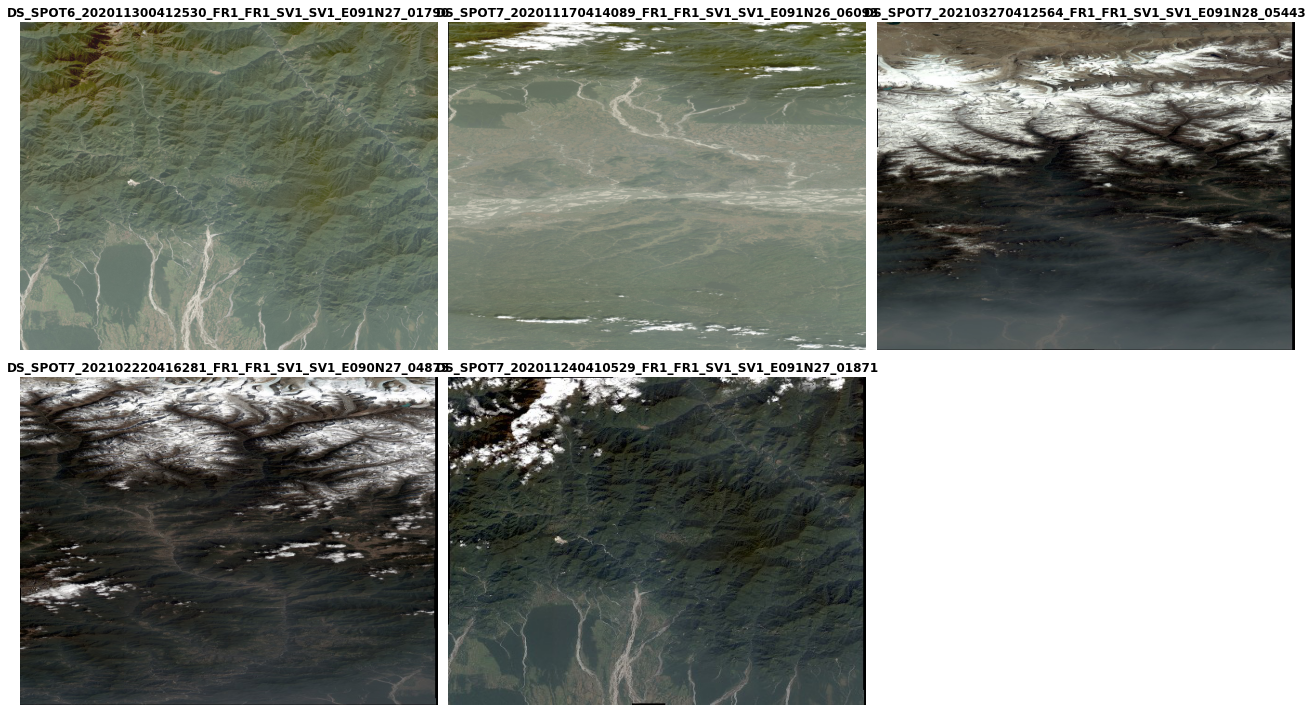

In [5]:
# Search the area via catalog search
search_parameters = catalog.construct_parameters(geometry=aoi, 
                                                 start_date="2020-01-01",
                                                 end_date="2021-05-31",
                                                 sensors=["spot"],
                                                 max_cloudcover=20,
                                                 sortby="cloudCoverage", 
                                                 limit=5)

search_results = catalog.search(search_parameters=search_parameters)
display(search_results.head())

catalog.download_quicklooks(image_ids=search_results.id.to_list(), 
                            sensor="spot", 
                            output_directory=spot_dir)

catalog.plot_quicklooks(figsize=(18,10), titles=search_results.sceneId.to_list())

# Select least cloud scene for further workflow
aoi["sceneId"] = search_results.sceneId.to_list()[0]

## Sentinel-2

In [11]:
# Search the area via catalog search
search_parameters = catalog.construct_parameters(geometry=aoi, 
                                                 start_date="2020-01-01",
                                                 end_date="2021-05-31",
                                                 sensors=["sentinel2"],
                                                 max_cloudcover=10,
                                                 sortby='cloudCoverage', 
                                                 limit=5)

search_results = catalog.search(search_parameters=search_parameters)
display(search_results.head())

catalog.download_quicklooks(image_ids=search_results.id.to_list(), 
                            sensor="sentinel2", 
                            output_directory=sentinel_dir)

catalog.plot_quicklooks(figsize=(15,10), titles=search_results.sceneId.to_list())

# Select least cloud scene for further workflow
aoi["sceneId"] = search_results.sceneId.to_list()[0]

2021-06-30 17:28:13,828 - Searching catalog with search_parameters: {'datetime': '2020-01-01T00:00:00Z/2021-05-31T23:59:59Z', 'intersects': {'type': 'Polygon', 'coordinates': (((90.23863465716029, 27.105424599204458), (90.64090865457698, 27.105424599204458), (90.64090865457698, 27.43797110373558), (90.23863465716029, 27.43797110373558), (90.23863465716029, 27.105424599204458)),)}, 'limit': 5, 'query': {'dataBlock': {'in': ['sobloo-s2-l1c-fullscene', 'sobloo-s2-l1c-aoiclipped']}, 'cloudCoverage': {'lte': 10}}, 'sortby': [{'field': 'properties.cloudCoverage', 'direction': 'asc'}]}
2021-06-30 17:28:20,713 - 0 results returned.


""


AttributeError: 'GeoDataFrame' object has no attribute 'id'